### Hierarchical_Clustering

Problem Statement: Cluster the Following Wholesale Data in Single,Complete and Centroid Linkage)

Dataset--> Wholesale customers data.csv

#### Single Linkage

In [1]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#import the required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Loading the Dataset
Dataset = pd.read_csv("C:/Users/Akaash/Downloads/Wholesale customers data.csv")
Dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
#Checking For NA Values
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


Inference: There are No NA Values in the Dataset

In [4]:
Dataset['Channel'].var()

0.2190722716918627

In [5]:
Dataset['Region'].var()

0.5994978256367766

Inference: The Variance of the column 'Channel' & 'Region' is very less So, droping them.

In [6]:
#Droping 'Channel' & 'Region' column
Dataset.drop(['Channel','Region'], axis = 1, inplace = True)
Dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Inference: Insignificant Columns are Dropped, And No Need to Normalize the values, as they are in same scale.

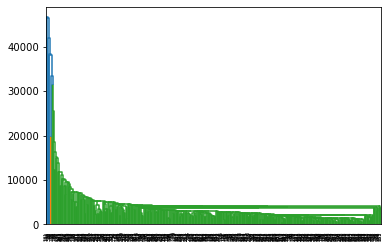

In [7]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(Dataset, method='single'))

In [8]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'single')

Inference: Creating No of Clusters = 6 , using Euclidean Distance, Linkage method = Single

In [9]:
# save clusters for chart
y_hc = hc.fit_predict(Dataset)

#Creating a Dataframe of Clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,0
1,0
2,0
3,0
4,0


In [10]:
#Appending the original Dataset with Clusters
Final = pd.concat([Dataset,Clusters], axis = 1)
Final

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [11]:
#Extracting Data Based on Particular Cluster
list(np.where(Final.Clusters==0))

[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
        145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 177, 178, 179

##### Inference: Gives the List of Data Belonging to 0 Cluster

#### Complete Linkage

In [12]:
#Using the Same Dataset Just Changing the Linkage Method 
Dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Inference: Insignificant Columns are Dropped, And No Need to Normalize the values, as they are in same scale.

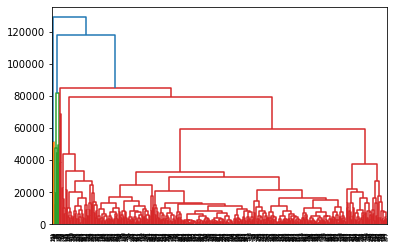

In [13]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(Dataset, method='complete'))

In [14]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

Inference: Creating No of Clusters = 4 , using Euclidean Distance, Linkage method = complete

In [15]:
# save clusters for chart
y_hc = hc.fit_predict(Dataset)

#Creating a Dataframe of Clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,2
1,2
2,2
3,2
4,2


In [16]:
#Appending the original Dataset with Clusters
Final = pd.concat([Dataset,Clusters], axis = 1)
Final

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,2
436,39228,1431,764,4510,93,2346,2
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,2


In [17]:
#Extracting Data Based on Particular Cluster
list(np.where(Final.Clusters==0))

[array([ 23,  47,  61,  85,  86, 333], dtype=int64)]

##### Inference: Gives the List of Data Belonging to 0 Cluster

#### Centroid Linkage

In [18]:
#Using The Same Dataset Just Changing the Linkage Method
Dataset.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


Inference: Insignificant Columns are Dropped, And No Need to Normalize the values, as they are in same scale.

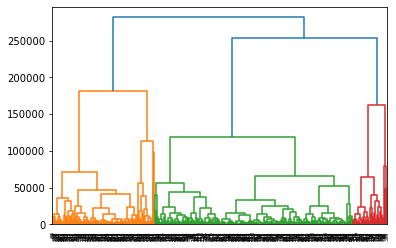

In [19]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(Dataset, method='ward'))

In [20]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

Inference: Creating No of Clusters = 5 , using Euclidean Distance, Linkage method = centroid is given by ward

In [21]:
# save clusters for chart
y_hc = hc.fit_predict(Dataset)

#Creating a Dataframe of Clusters
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters.head()

,Clusters
0,0
1,0
2,0
3,0
4,3


In [22]:
#Appending the original Dataset with Clusters
Final = pd.concat([Dataset,Clusters], axis = 1)
Final

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Clusters
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,3
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,3
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,4
438,10290,1981,2232,1038,168,2125,0


In [23]:
#Extracting Data Based on Particular Cluster
list(np.where(Final.Clusters==3))

[array([  4,  12,  13,  14,  18,  20,  22,  24,  25,  27,  30,  32,  33,
         36,  40,  41,  54,  58,  67,  70,  71,  73,  75,  83,  89, 104,
        105, 112, 113, 114, 118, 120, 122, 126, 127, 132, 140, 141, 142,
        144, 149, 150, 152, 157, 161, 162, 180, 190, 191, 195, 196, 202,
        210, 217, 220, 226, 232, 234, 237, 240, 241, 242, 247, 248, 253,
        255, 262, 267, 269, 276, 279, 283, 287, 288, 294, 296, 300, 307,
        311, 322, 323, 324, 328, 332, 334, 335, 336, 347, 356, 360, 368,
        371, 373, 380, 381, 382, 387, 393, 401, 402, 403, 404, 406, 421,
        422, 423, 424, 427, 432, 434, 435], dtype=int64)]

##### Inference: Gives the List of Data Belonging to 3 Cluster

### Inference:
Hierarchical Clustering is Not Applicable on Large Dataset as It uses Euclidean Distance, proof it look about 2-3 minute to run the dendrogram code on my machine.